**Challenge 1**

Load the data into a pandas dataframe. Replace 'y's with 1s, 'n's with 0s.

Now, almost every representative has a ?. This represents a no vote (they were absent or some other similar reason). If we dropped all the rows that had a ?, we would throw out most of our data. Instead, we will replace ? with the best guess in the Bayesian sense: in the absence of any other information, we will say that the probability of the representative saying YES is the ratio of others that said YES over the whole votes.

So, convert each ? to this probability (when yes=1 and no=0, this is the mean of the column)

In [2]:
import pandas as pd

In [3]:
df = pd.DataFrame.from_csv('house-votes-84.data.txt', header=-1, infer_datetime_format=True)

In [4]:
df.replace(['y','n'], [1,0], inplace=True)
df = df.convert_objects(convert_numeric=True)

In [5]:
df = df.fillna(df.mean())

In [6]:
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,,,,,,,,,,,,,,,,
republican,0.00000,1,0,1.000000,1.000000,1,0,0,0,1,0.362319,1.000000,1,1,0,1.000000
republican,0.00000,1,0,1.000000,1.000000,1,0,0,0,0,0.000000,1.000000,1,1,0,0.812689
democrat,0.44208,1,1,0.417453,1.000000,1,0,0,0,0,1.000000,0.000000,1,1,0,0.000000
democrat,0.00000,1,1,0.000000,0.504762,1,0,0,0,0,1.000000,0.000000,1,0,0,1.000000
democrat,1.00000,1,1,0.000000,1.000000,1,0,0,0,0,1.000000,0.423267,1,1,1,1.000000


**Challenge 2**

Split the data into a test and training set. But this time, use this function:

```
from sklearn.cross_validation import train_test_split
```

In [7]:
from sklearn.cross_validation import train_test_split

In [8]:
df_train, df_test = train_test_split(df, test_size=0.33, random_state=42)

In [9]:
df_train.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000
mean,0.445143,0.497003,0.538741,0.448470,0.532810,0.656811,0.560978,0.537768,0.460556,0.503517,0.328901,0.465916,0.509262,0.627879,0.421633,0.812761
std,0.490957,0.471600,0.492664,0.493119,0.491082,0.468875,0.487670,0.488348,0.483512,0.496528,0.459488,0.478176,0.483261,0.472902,0.479070,0.338985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.812689
50%,0.000000,0.503876,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.504673,0.000000,0.423267,0.509756,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df_test.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,0.435891,0.517765,0.713820,0.354773,0.448082,0.610587,0.581271,0.653836,0.583367,0.507009,0.429851,0.337081,0.510755,0.523425,0.439411,0.812542
std,0.490622,0.474561,0.447952,0.471176,0.490197,0.484364,0.489845,0.473816,0.487603,0.498199,0.483598,0.463441,0.492843,0.494415,0.480558,0.345425
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.812689
50%,0.000000,0.503876,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.752336,0.000000,0.000000,0.509756,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Challenge 3**

Using scikit.learn's KNN algorithm, train a model that predicts the party (republican/democrat):

```
from sklearn.neighbors import KNeighborsClassifier
```

Try it with a lot of different k values (number of neighbors), from 1 to 20, and on the test set calculate the accuracy (number of correct predictions / number of all predictions) for each k

You can use this to calculate accuracy:

```
from sklearn.metrics import accuracy_score
```

Which k value gives the highest accuracy?

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [12]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(df_train.values, df_train.index) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=3, p=2, weights='uniform')

In [13]:
test_results = neigh.predict(df_test.values)
accuracy_score(df_test.index, test_results)

0.95138888888888884

In [14]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(df_train.values, df_train.index) 
accuracy_score(df_test.index, neigh.predict(df_test.values))

0.92361111111111116

In [15]:
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(df_train.values, df_train.index) 
accuracy_score(df_test.index, neigh.predict(df_test.values))

0.93055555555555558

In [16]:
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(df_train.values, df_train.index) 
accuracy_score(df_test.index, neigh.predict(df_test.values))

0.94444444444444442

**Challenge 4**

Make a similar model but with LogisticRegression instead, calculate test accuracy.

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
logistic_reg = LogisticRegression()

In [19]:
logistic_reg.fit(df_train.values, df_train.index)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [20]:
logistic_test_results = logistic_reg.predict(df_test.values)
accuracy_score(df_test.index, logistic_test_results)

0.97222222222222221

**Challenge 5**

Make a bar graph of democrats and republicans. How many of each are there?

Make a very simple predictor that predicts 'democrat' for every incoming example.

Just make a function that takes in an X --an array or matrix with input examples--, and returns an array of the same length as X, where each value is 'democrat'. For example, if X is three rows, your function should return ['democrat','democrat','democrat']. Make a y_predicted vector using this and measure its accuracy.

Do the same with predicting 'republican' all the time and measure its accuracy.

In [21]:
%matplotlib inline 
import matplotlib.pyplot as plt

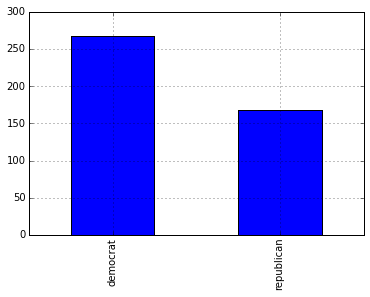

In [22]:
df.index.value_counts().plot(kind='bar')

In [23]:
import numpy as np

In [24]:
def all_dems(voting_matrix):
    return np.array(['democrat'] * len(voting_matrix))

In [25]:
def all_reps(voting_matrix):
    return np.array(['republican'] * len(voting_matrix))

In [26]:
accuracy_score(df_test.index, all_dems(df_test))

0.67361111111111116

In [27]:
accuracy_score(df_test.index, all_reps(df_test))

0.3263888888888889

**Challenge 6**

Plot the accuracies as a function of k. Since k only matters for KNN, your logistic regression accuracy, 'democrat' predictor accuracy and 'republican' predictor accuracy will stay the same over all k, so each of these three will be a horizontal line. But the KNN accuracy will change with k.

In [28]:
k = np.array(range(1,100))
accuracy_df = pd.DataFrame(k, columns=['k'])
accuracy_df['democrat'] = accuracy_score(df_test.index, all_dems(df_test))
accuracy_df['republican'] = accuracy_score(df_test.index, all_reps(df_test))
accuracy_df['logistic'] = accuracy_score(df_test.index, logistic_test_results)

In [29]:
k_list = []
for i in k:   
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(df_train.values, df_train.index) 
    k_list.append(accuracy_score(df_test.index, neigh.predict(df_test.values)))

accuracy_df['KNN'] = k_list


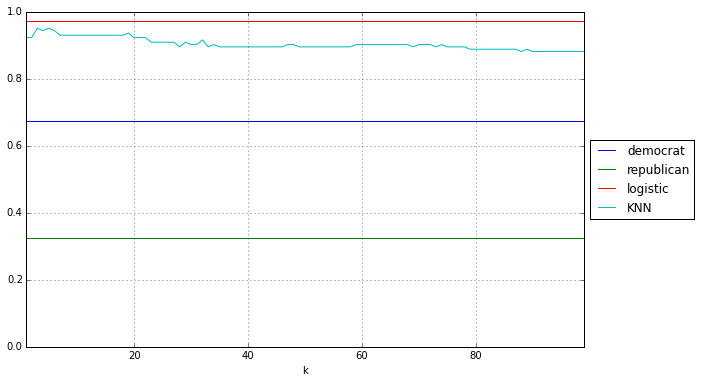

In [30]:
ax = accuracy_df.set_index('k').plot(figsize=(10,6))
ax.set_ylim(0,100)
ax.set_ylim(0,1)
ax.legend(loc = 'center left', bbox_to_anchor = (1.0, 0.5))

**Challenge 7**

Plot a learning curve for the logistic regression model. But instead of going through the painstaking steps of doing it yourself, use this function:

```
from sklearn.learning_curve import learning_curve
```

This will give you the m, training errors and testing errors. All you need to do is plot them. You don't even need to give it separate training/test sets. It will do crossvalidation all by itself. Easy, isn't it? : )
Remember, since it does cross-validation, it doesn't have a single training error or test error per m value. Instead, it has one for each fold (separate partition) of the cross validation. A good idea is to take the mean of these errors from different folds. This gives you a meaningful single number per m. What I mean is that doing something like:

```
train_cv_err = np.mean(train_err,axis=1)
test_cv_err = np.mean(ts_err,axis=1)
```

Before plotting `m` vs `train_cv_err` and `m` vs `test_cv_err`, where `train_err` and `test_err` are the vectors returned by the learning curve function. The `np.mean(...., axis=1)` means take the mean along axis 1 (axis 1 is the columns axis-- for each row, you have a bunch of columns, each corresponding to a cross validation fold, you are averaging these columns for each row).

Draw the learning curve for KNN with the best k value as well.

In [31]:
from sklearn.learning_curve import learning_curve

In [32]:
X=df_train.values
y=df_train.index
train_sizes, train_scores, valid_scores = learning_curve(LogisticRegression(), X, y, train_sizes=[50, 80, 110], cv=5)

In [33]:
train_cv_err = np.mean(train_scores,axis=1)
test_cv_err = np.mean(valid_scores,axis=1)

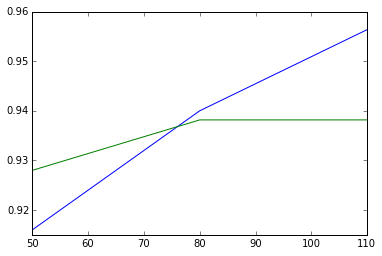

In [34]:
plt.plot(train_sizes, train_cv_err)
plt.plot(train_sizes, test_cv_err)

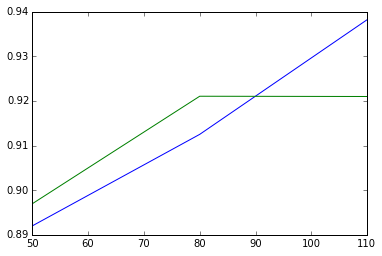

In [35]:
#Draw the learning curve for KNN with the best k value as well.
X=df_train.values
y=df_train.index
train_sizes, train_scores, valid_scores = learning_curve(KNeighborsClassifier(), X, y, train_sizes=[50, 80, 110], cv=5)
train_cv_err = np.mean(train_scores,axis=1)
test_cv_err = np.mean(valid_scores,axis=1)
plt.plot(train_sizes, train_cv_err)
plt.plot(train_sizes, test_cv_err)

**Challenge 8**

This is a preview of many other classification algorithms that we will go over. Scikit.learn has the same interface for all of these, so you can use them exactly the same way as you did LogisticRegression and KNeighborsClassifier. Use each of these to classify your data and print the test accuracy of each:

Gaussian Naive Bayes

```
from sklearn.naive_bayes import GaussianNB
```

SVM (Support Vector Machine) Classifier

```
from sklearn.svm import SVC
```

Decision Tree

```
from sklearn.tree import DecisionTreeClassifier
```

Random Forest

```
from sklearn.ensemble import RandomForestClassifier
```


In [36]:
from sklearn.naive_bayes import GaussianNB
gaussian_reg = GaussianNB()
gaussian_reg.fit(df_train.values, df_train.index)
gaussian_test_results = gaussian_reg.predict(df_test.values)
accuracy_score(df_test.index, gaussian_test_results)

0.93055555555555558

In [37]:
from sklearn.svm import SVC
svc_reg = SVC()
svc_reg.fit(df_train.values, df_train.index)
svc_test_results = svc_reg.predict(df_test.values)
accuracy_score(df_test.index, svc_test_results)

0.96527777777777779

In [38]:
from sklearn.tree import DecisionTreeClassifier
dtc_reg = DecisionTreeClassifier()
dtc_reg.fit(df_train.values, df_train.index)
dtc_test_results = dtc_reg.predict(df_test.values)
accuracy_score(df_test.index, dtc_test_results)

0.95138888888888884

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc_reg = RandomForestClassifier()
rfc_reg.fit(df_train.values, df_train.index)
rfc_test_results = rfc_reg.predict(df_test.values)
accuracy_score(df_test.index, rfc_test_results)

0.95138888888888884

**Challenge 9**

There is actually a way to do cross validation quickly to get your accuracy results for an algorithm, without separating training and test yourself:

```
from sklearn.cross_validation import cross_val_score
```

Just like the `learning_curve` function, this takes a classifier object, `X` and `Y`. Returns accuracy (or whatever score you prefer by using the _scoring_ keyword argument). Of course, it will return a score for each cross validation fold, so to get the generalized accuracy, you need to take the mean of what it returns.

Use this function to calculate the cross validation score of each of the classifiers you tried before.

In [40]:
from sklearn.cross_validation import cross_val_score
X=df_train.values
y=df_train.index
print "GaussianNB " + str(np.mean(cross_val_score(GaussianNB(), X, y)))
print "SVC " + str(np.mean(cross_val_score(SVC(), X, y)))
print "DecisionTreeClassifier " + str(np.mean(cross_val_score(DecisionTreeClassifier(), X, y)))
print "RandomForestClassifier " + str(np.mean(cross_val_score(RandomForestClassifier(), X, y)))

GaussianNB 0.924358446128
SVC 0.955395130561
DecisionTreeClassifier 0.934703520583
RandomForestClassifier 0.934704251116


**Challenge 10**

Instead of 'democrat' or 'republican', can you predict the vote of a representative based on their other votes?

Reload the data from scratch. Convert y-->1, n-->0.

Choose one vote. Build a classifier (logistic regression or KNN), that uses the other votes (do not use the party as a feature) to predict if the vote will be 1 or 0.

Convert each ? to the mode of the column (if a senator has not voted, make their vote 1 if most others voted 1, make it 0 if most others voted 0).

Calculate the cross validation accuracy of your classifier for predicting how each representative will vote on the issue.


In [112]:
df2 = pd.DataFrame.from_csv('house-votes-84.data.txt', header=-1, infer_datetime_format=True)
df2.replace(['y','n'], [1,0], inplace=True)
df2 = df2.convert_objects(convert_numeric=True)

In [134]:
df2 = df2.fillna(df2.mode)

In [135]:
df2.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,,,,,,,,,,,,,,,,
republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
democrat,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [147]:
y = df2[16]
X = df2.ix[:,1:15]

In [149]:
np.mean(cross_val_score(LogisticRegression(), X, y))

0.6069787784950752

**Challenge 11**

Back to your movie data! Choose one categoric feature to predict. I chose MPAA Rating, but genre, month, etc. are all decent choices. If you don't have any non-numeric features, you can make two bins out of a numeric one (like "Runtime>100 mins" and "Runtime<=100 mins")

Make a bar graph of how many of each movie there is in the data. For example, with Ratings, show how many G, PG, PG-13, R movies there are, etc. (basically a histogram of your labels).

Predict your outcome variable (labels) using KNN and logistic regression. Calculate their accuracies.

Make a baseline stupid predictor that always predicts the label that is present the most in the data. Calculate its accuracy on a test set.

How much better do KNN and logistic regression do versus the baseline?

What are the coefficients of logistic regression? Which features affect the outcome how?


In [351]:
movies_df = pd.DataFrame.from_csv("2013_movies.csv", infer_datetime_format=True)

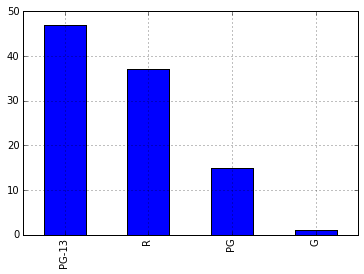

In [352]:
movies_df['Rating'].value_counts().plot(kind='bar')

In [353]:
movies_df.replace(['G','PG','PG-13','R'], [1,2,3,4], inplace=True)

In [354]:
movies_df = movies_df.dropna()

In [355]:
movies_train, movies_test = train_test_split(movies_df, test_size=0.33, random_state=42)

In [356]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(movies_train[['DomesticTotalGross', 'Budget', 'Runtime']].values, movies_train['Rating'].values) 
test_results = neigh.predict(movies_test[['DomesticTotalGross', 'Budget', 'Runtime']].values)
knn_acc = accuracy_score(movies_test.Rating, test_results)
print "KNN is " + str(knn_acc)

KNN is 0.551724137931


In [357]:
logistic_reg = LogisticRegression()
logistic_reg.fit(movies_train[['DomesticTotalGross', 'Budget', 'Runtime']].values, movies_train.Rating.values) 
log_test_results = logistic_reg.predict(movies_test[['DomesticTotalGross', 'Budget', 'Runtime']].values)
log_acc = accuracy_score(movies_test.Rating, log_test_results)
print "LogisticRegression is " + str(log_acc)

LogisticRegression is 0.51724137931


In [358]:
stupid_test_results = [2 for _ in range(len(movies_test.Rating))]
stupid_acc = accuracy_score(movies_test.Rating, stupid_test_results)

In [359]:
print "StupidPredictor is " + str(stupid_acc)

StupidPredictor is 0.103448275862


In [360]:
print("KNN and LogisticRegression do {0} and {1}% better than baseline, respectively".format(knn_acc - stupid_acc, log_acc - stupid_acc))

KNN and LogisticRegression do 0.448275862069 and 0.413793103448% better than baseline, respectively


In [362]:
# What are the coefficients of logistic regression? Which features affect the outcome how?
print logistic_reg.intercept_
print logistic_reg.coef_

[ -1.17950119e-15  -4.48889914e-16   6.63897437e-16]
[[ -2.97882963e-09  -6.50980251e-09  -1.43695146e-13]
 [ -7.14675336e-09   8.97472058e-09  -4.21663757e-14]
 [  3.97067711e-09  -1.72063173e-08   9.36958969e-14]]


In [372]:
print ("The PG rating is more likely with a decrease in TotalGross, Budget, and runtime. The PG-13 rating is more likely with a decrease in Total Gross, a increase in budget, and a decrease in runtime. An R rating is more likely with an increase in TotalGross, a decrease in budget and an increase in runtime") 

The PG rating is more likely with a decrease in TotalGross, Budget, and runtime. The PG-13 rating is more likely with a decrease in Total Gross, a increase in budget, and a decrease in runtime. An R rating is more likely with an increase in TotalGross, a decrease in budget and an increase in runtime


In [371]:
# log_test_results

In [370]:
# logistic_reg.predict_proba(movies_test[['DomesticTotalGross', 'Budget', 'Runtime']].values)
# print movies_train.Rating.value_counts()

#Why am I getting three of everything here???

**Challenge 12**

Now you are a classification master. The representative votes dataset only had 0s and 1s. Let's just swiftly tackle the breast cancer surgery data we talked about in class.

Get it from here: [Haberman Survival Dataset](https://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival)

 * What is the average and standard deviation of the age of all of the patients?
 * What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?
 * What is the average and standard deviation of the age of those patients who survived fewer than 5 years after surgery?
 * Plot a histogram of the ages side by side with a histogram of the number of axillary nodes.
 * What is the earliest year of surgery in this dataset?
 * What is the most recent year of surgery?
 * Use logistic regression to predict survival after 5 years. How well does your model do?
 * What are the coefficients of logistic regression? Which features affect the outcome how?
 * Draw the learning curve for logistic regression in this case.


In [256]:
haberman_df = pd.DataFrame.from_csv('haberman.data.txt', header=-1, infer_datetime_format=True)

In [257]:
haberman_df = haberman_df.reset_index()
haberman_df.columns = ['age','year_of_op','nodes','survival']

In [258]:
haberman_df.head()

,age,year_of_op,nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


1. Age of patient at time of operation (numerical) 
2. Patient's year of operation (year - 1900, numerical) 
3. Number of positive axillary nodes detected (numerical) 
4. Survival status (class attribute) 
-- 1 = the patient survived 5 years or longer 
-- 2 = the patient died within 5 year

In [260]:
#What is the average and standard deviation of the age of all of the patients?
print haberman_df.age.mean()
print haberman_df.age.std()

52.4575163399
10.8034523493


In [265]:
# What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?
print haberman_df[(haberman_df.survival == 1)].age.mean()
print haberman_df[(haberman_df.survival == 1)].age.std()

52.0177777778
11.0121541799


In [267]:
# What is the average and standard deviation of the age of those patients who survived fewer than 5 years after surgery?
print haberman_df[(haberman_df.survival == 2)].age.mean()
print haberman_df[(haberman_df.survival == 2)].age.std()

53.6790123457
10.1671372083


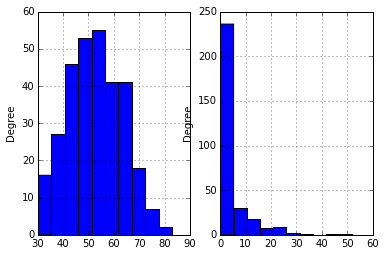

In [275]:
# Plot a histogram of the ages side by side with a histogram of the number of axillary nodes.
fig, axs = plt.subplots(1,2)
haberman_df.age.plot(kind='hist', ax=axs[0])
haberman_df.nodes.plot(kind='hist', ax=axs[1])

In [277]:
#What is the earliest year of surgery in this dataset?
haberman_df.year_of_op.min()

58

In [279]:
# What is the most recent year of surgery? 
haberman_df.year_of_op.max()

69

In [348]:
# Use logistic regression to predict survival after 5 years. How well does your model do?
haberman_train, haberman_test = train_test_split(haberman_df, test_size=0.33, random_state=42)

haberman_log_reg = LogisticRegression()
haberman_log_reg.fit(haberman_train[['age','year_of_op','nodes']].values, haberman_train.survival.values) 
haberman_log_test_results = haberman_log_reg.predict(haberman_test[['age','year_of_op','nodes']].values)
haberman_log_acc = accuracy_score(haberman_test.survival, haberman_log_test_results)
print haberman_log_acc

0.752475247525


In [317]:
#What are the coefficients of logistic regression? Which features affect the outcome how?
print haberman_log_reg.intercept_
print haberman_log_reg.coef_
print("Chance of survival past five years decreases by ~0.03 for every 1 increase in age unit. Chance of survival increases by ~0.05 for every 1 increase in year of operation unit. Chance of survival decreases by ~0.09 for every 1 increase in node unit.")

[-0.00064239]
[[ 0.02849106 -0.04690972  0.09046361]]
Chance of survival past five years decreases by ~0.03 for every 1 increase in age unit. Chance of survival increases by ~0.05 for every 1 increase in year of operation unit. Chance of survival decreases by ~0.09 for every 1 increase in node unit.


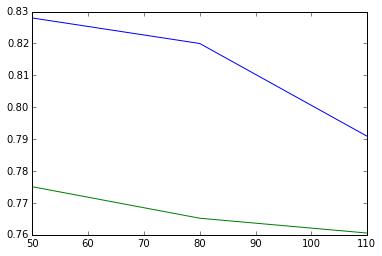

In [314]:
# Draw the learning curve for logistic regression in this case.
X=haberman_train[['age','year_of_op','nodes']].values
y=haberman_train.survival.values
haberman_train_sizes, haberman_train_scores, haberman_valid_scores = learning_curve(LogisticRegression(), X, y, train_sizes=[50, 80, 110], cv=5)
haberman_train_cv_err = np.mean(haberman_train_scores,axis=1)
haberman_test_cv_err = np.mean(haberman_valid_scores,axis=1)
plt.plot(haberman_train_sizes, haberman_train_cv_err)
plt.plot(haberman_train_sizes, haberman_test_cv_err)

In [311]:
print X.shape
print y.shape

(101, 3)
(205,)
